# **Project: Decision Trees and Random Forest - Predicting Potential Customers**

# Marks: 30


Welcome to the project on classification using decision trees and random forests. 

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as **leads**. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking details about the program through email, Representative shared information with a lead like a brochure of program, etc.
    * Phone Activity: Had a Phone Conversation with a representative, Had a conversation over SMS with a representative, etc.
    * Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc.

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

### Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

#Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [2]:
saved_path = '/content/ExtraaLearn.csv'
learn = pd.read_csv(saved_path)

In [3]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

### View the first and last 5 rows of the dataset

In [4]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


### Understand the shape of the dataset

In [6]:
data.shape

(4612, 15)

* The dataset has **4612 rows and 15 columns** 

### Check the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

* `website_visits`, `time_spent_on_website`, `page_views_per_visit`, and `status` are of numeric type while rest columns are object type in nature.

* There are **no null values** in the dataset.

In [8]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data

## Exploratory Data Analysis

### Univariate Analysis

**Let's check the statistical summary of the data.**

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**

* The average age of leads in the data is 48.5 years and the median age is 51 years. This implies that the majority of leads have good work experience and they may be looking for a shift in career or upskill themselves. 
* On average a lead visits the website 3 times. There are some leads who have never visited the website.
* On average the leads spent 724 seconds or 12 minutes on the website. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* The distribution of the average page views per visit suggests that there might be outliers in this column.

In [10]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

EXT1304    0.000217
EXT2870    0.000217
EXT2636    0.000217
EXT4198    0.000217
EXT822     0.000217
             ...   
EXT2161    0.000217
EXT3174    0.000217
EXT492     0.000217
EXT693     0.000217
EXT4149    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 

**Observations:**
* Most of the leads are working professions.
* As expected, majority of the leads interacted with ExtraaLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively.
* Only 2.3% of the profile completions are categorized as low.
* 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that majority of the leads prefer to communicate via email.
* Very few leads are acquired from print media, digital, media and referrals.

In [11]:
# checking the number of unique values
data["ID"].nunique()

4612

* All the values in the case id column are unique.
* We can drop this column.

In [12]:
data.drop(["ID"], axis=1, inplace=True)

**Let's check how many leads have been converted**

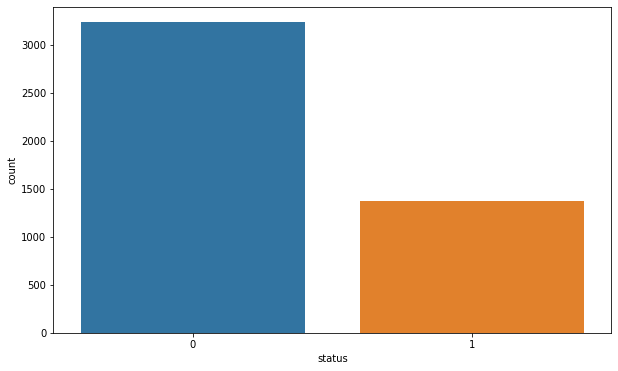

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=data)
plt.show()

- The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.
- The plot indicates that ~30% of leads have been converted.

#### Let's check the distribution and outliers for numerical columns in the data

### **Question 1: Provide observations for below distribution plots and box plots (2 Marks)**

age
Skew : -0.72


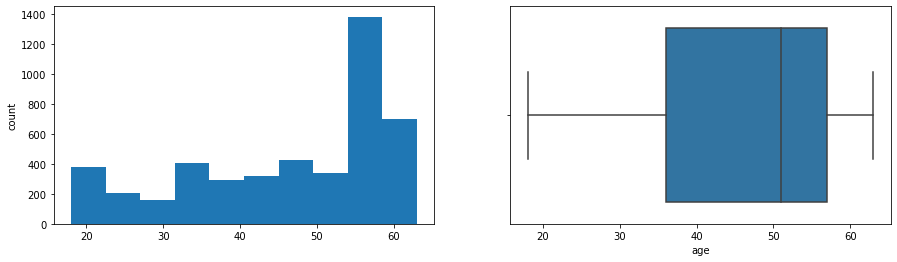

website_visits
Skew : 2.16


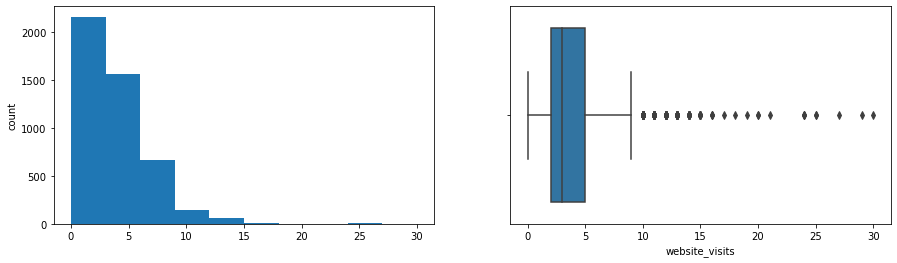

time_spent_on_website
Skew : 0.95


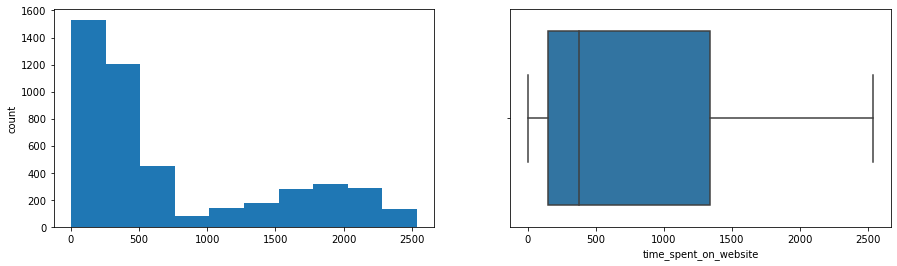

page_views_per_visit
Skew : 1.27


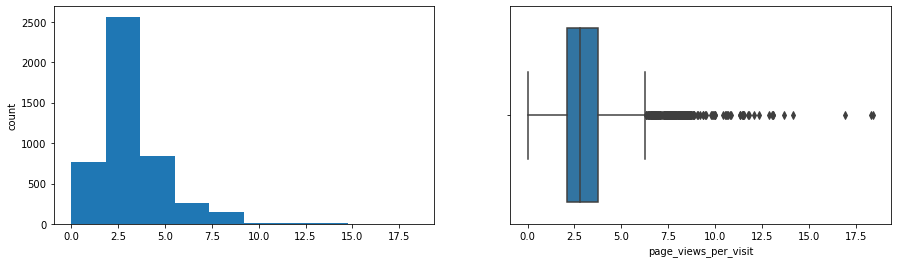

In [ ]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- The variable 'age' is slightly negatively or left skewed, whereas the other variables are right skewed.  
- There are no outliers in the variables 'age' and 'time_spent_on_website', whereas (as noted above) the variables 'website_visits' and 'page_views_per_visit' are riddled with outliers on the high side of the upper whisker.  
- The median age is about 50 years, median website_visits are ~2.5, median time_spent_on_website is about 375 seconds (6.25 minutes), median page_views_per_visit is about 2.5-3.  

### Bivariate Analysis

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it

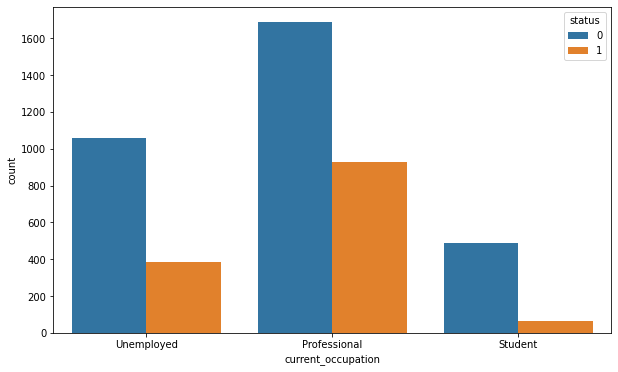

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='current_occupation', hue='status', data=data)
plt.show()

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. 
- This shows that the currently offered program is more oriented towards working professionals or unemployed personnels. The program might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in the current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

**Age can also be a good factor to differentiate between such leads. Let's explore this**

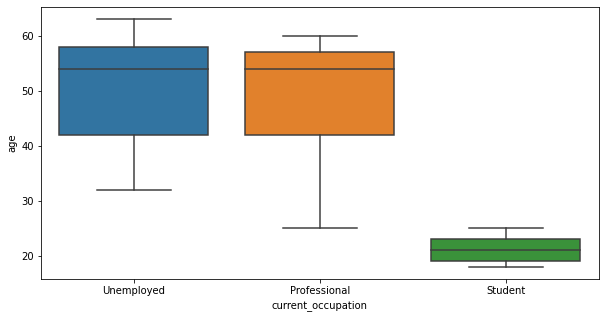

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["current_occupation"], data["age"])
plt.show()

In [16]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


* The range of age for students is 18 to 25 years.
* The range of age for professionals vary from 25 years to 60 years.
* The currently unemployed leads have age range from 32 to 63 years.
* The average age of working professionals and unemployed leads is almost equal to 50 years.

**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

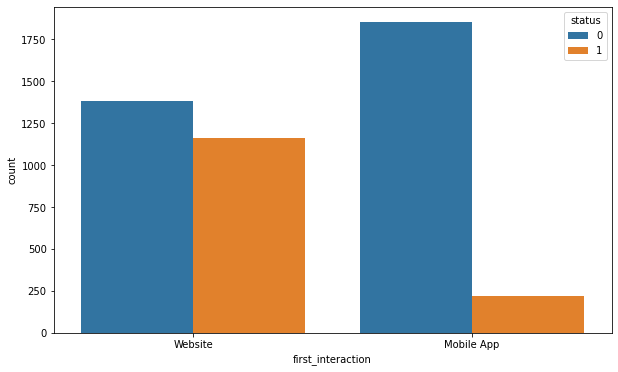

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='first_interaction', hue='status', data=data)
plt.show()

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the percentage of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through websites were converted to paid customers while only around a small number of the leads who interacted through mobile app converted.

**We saw earlier that there is a positive correlation between status and time spent on the website. Let's analyze it further**

### **Question 2:** 
- **Create a boxplot for variables 'status' and 'time_spent_on_website'. (use sns.boxplot() function) (1 Mark)**
- **Provide your observations from the plot (1 Mark)**

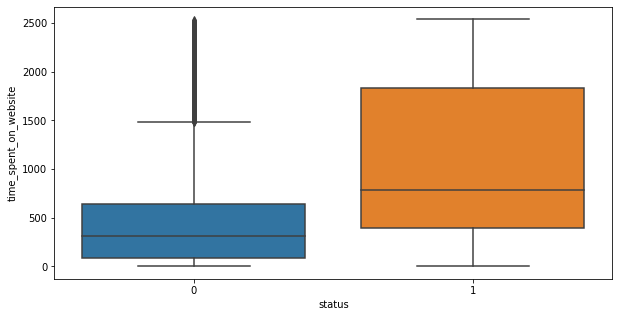

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['status'], data['time_spent_on_website']) #write your code here
plt.show()

**Observations:**

- The ranges for time_spent_on_website for the leads that converted versus the leads that did not convert is about the same, although the time spent for the leads that did not convert has a great number of outliers on the higher end of the upper whisker.  
- The median time_spent_on_website for converted leads (~ 750 seconds) is almost twice the the median time spent by unconverted leads (~ 300 seconds).
- The IQR of time spent by converted leads is also much higher (~ 1350 seconds) than the IQR of time time spent by unconverted leads (~ 500 seconds).   

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

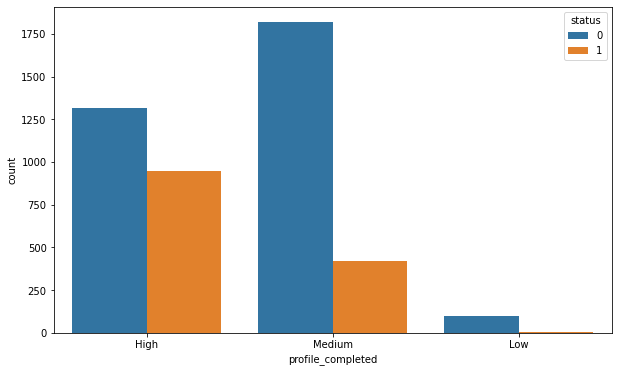

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='profile_completed', hue='status', data=data)
plt.show()

* The leads who have shared their complete details with the company converted more as compared to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

**Referrals from a converted lead can be a good source of income with very low cost of advertisement. Let's see how referrals impacts lead conversion status**

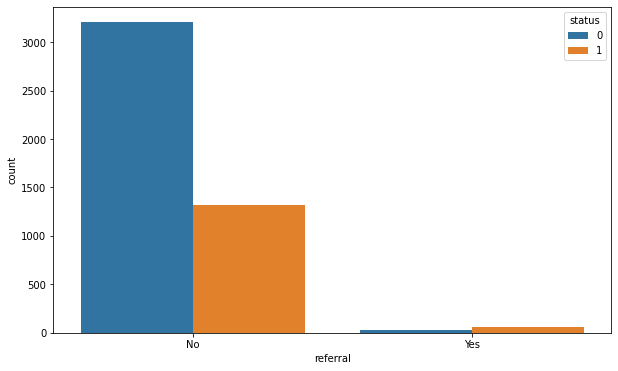

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='referral', hue='status', data=data)
plt.show()

**Observations:**
* There are very less number of referrals but the conversion percentage is high. 
* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the numerical variables.**

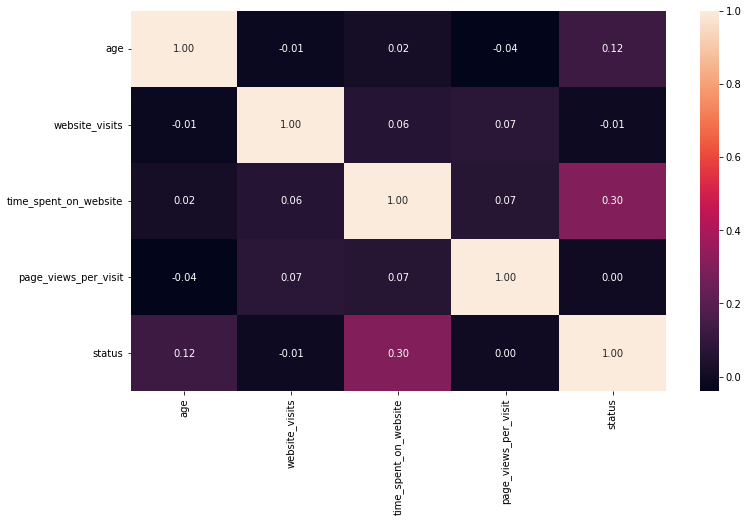

In [21]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

* There's a weak positive correlation between status and time spent on website. This implies that a person spending more time on website is more likely to bet converted. 
* There's no correlation between any independent variable.

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [22]:
#Separating target variable and other variables
X=data.drop(columns='status')
Y=data['status']

In [23]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [24]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

**Checking the shape of the train and test data**

In [25]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## Building Classification Models

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a lead will not converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will converted to a paid customer in reality, the lead would not have converted to a paid customer. 

### Which case is more important? 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false positive cases.

Losing a potential customer is a greater loss for the organization.

### How to reduce the losses?

* Company would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [26]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Decision Tree

### **Question 3:** 
- **Fit the decision tree classifier on the training data (use random_state=7) (1 Mark)**
- **Check the performance on both training and testing data (use metrics_score function) (1 Mark)**
- **Write your observations (2 Marks)**

In [27]:
#Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

**Let's check the performance on the training data:**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



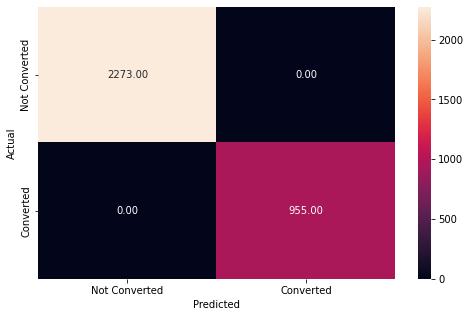

In [28]:
#Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

**Observations:**
- The model is likely overfit to the training data.  

- TP (no converted correctly identified): 955
- FN (no converted incorrectly identified): 0
- TN (no not-converted correctly identified): 2273
- FP (no not-converted incorrectly identified): 0

- Total correct decisions: TP + TN = 3228
- Total errors: FN + FP = 0
- Overall Accuracy = 100%
- Overall F1-score = 100%

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



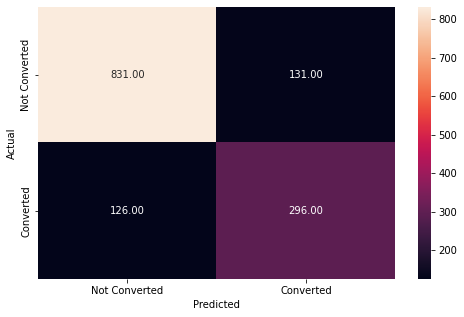

In [29]:
#Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

**Observations:**

As noted above, the model is likely overfit to the training data, as it performs much worse on the test data.
For the test set: 
- TP (no converted correctly identified): 296
- FN (no converted incorrectly identified): 126
- TN (no not-converted correctly identified): 831
- FP (no not-converted incorrectly identified): 131
- Total correct decisions: TP + TN = 1127
- Total errors: FN + FP = 257
- Overall Accuracy = ~ 81%
- Overall F1-score = ~ 70-87%

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** in order to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with value equal to {0:0.3, 1:0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [30]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0:0.3, 1:0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

### **Question 4:**
- **Check the performance on both training and testing data (2 Marks)**
- **Compare the results with the results from the decision tree model with default parameters and write your observations (2 Marks)**

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



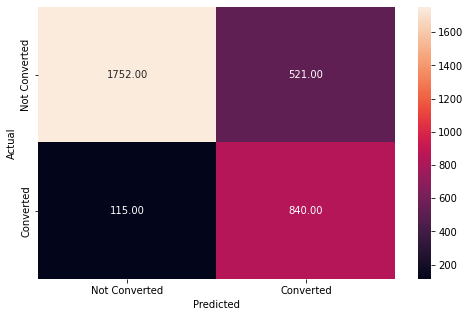

In [31]:
#Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

**Observations:**

- The tuned decision tree performs worse than the original decision tree on the training dataset, indicating that we may have overcome the problem of overfitting somewhat. 
- The average accuracy on the training data set is now ~ 80% for the tuned model, compared to 100% for the original base model.  
- The f1-score for the tuned decision is also lower for the tuned decision tree (~ 73-85%) compared to the original decision tree. 

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



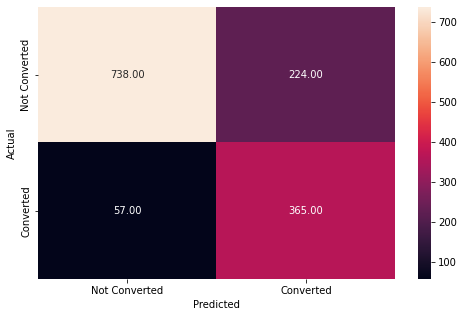

In [32]:
#Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

**Observations:**

- The performance of the tuned decision tree on the training and test datasets is now comparable, so we are no longer encountering a situation of strong overfitting on the training dataset.
- However, the performance on the test dataset for the tuned decision tree is not much superior to the performance of the original base decision tree on the test dataset. 
- On the test dataset, the average accuracy of both models (tuned and original decision trees) is about 80% and the f1-scores for both models range from ~ 70-85%. 

**Let's visualize the tuned decision tree** and observe the decision rules:

### **Question 5: Write your observations from the below visualization of the tuned decision tree (3 Marks)**

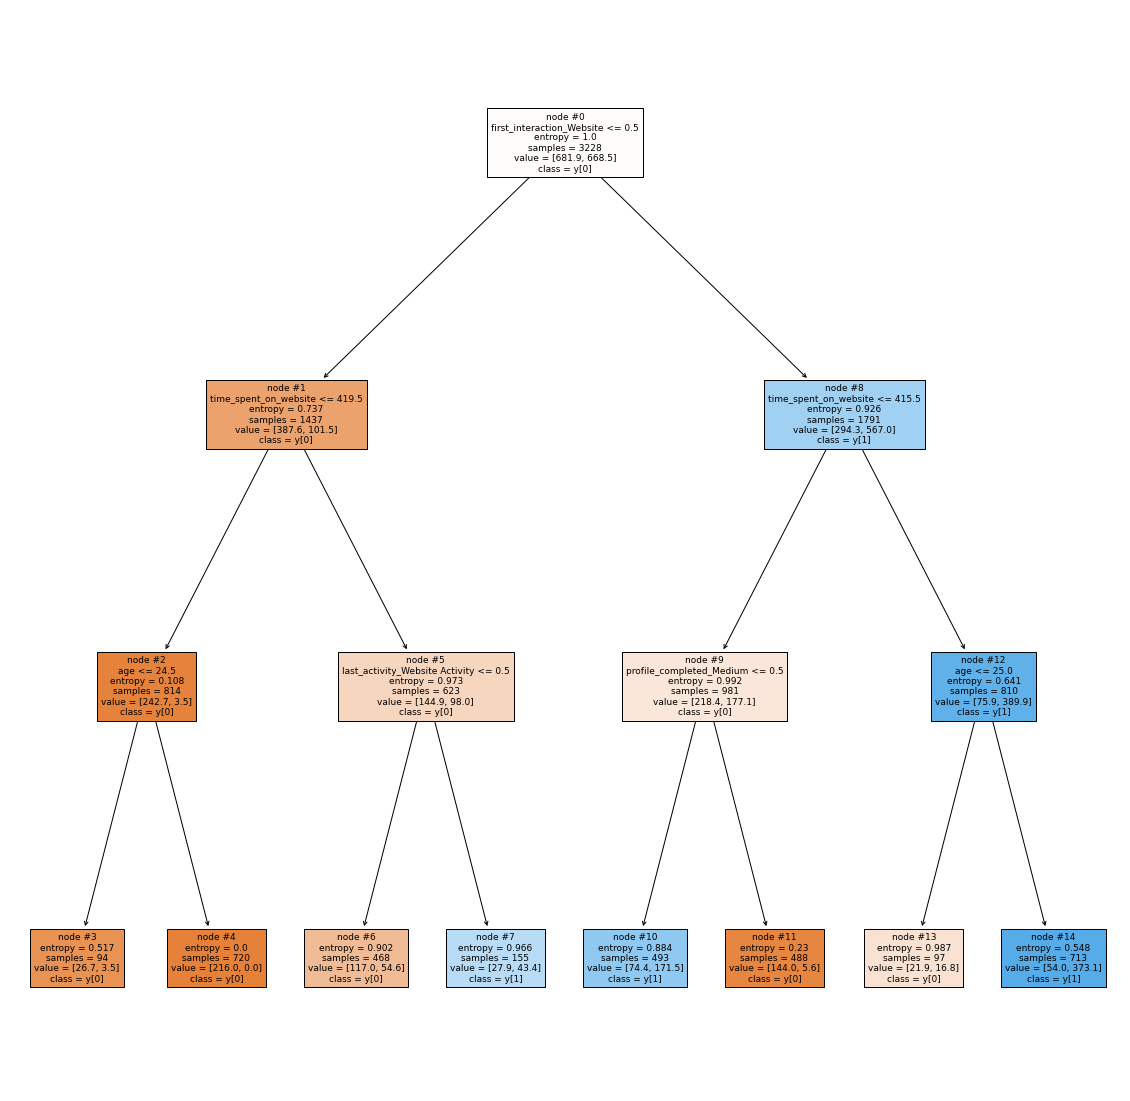

In [ ]:
features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

**Note:** Blue leaves represent the converted customers i.e. **y[1]**, while the orange leaves represent the nont converted customers i.e. **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**

According to the tuned decision tree above
- At node 0, the first (and most important) split was made on whether the first interaction was a website or not.  
- If the first interaction was a website, the next split (at node 8) was based on a first threshold (415.5) of time_spent_on_website.  If the first interaction was not a website (was mobile, instead), the next split (at node 1) was based on a second threshold (419.5) of the time_spent_on_website.  Thus, time_spent_on_website is the second feature considered by the tuned decision tree.   
- At nodes 0, 1, and 8: the entropy is not sufficiently low to end the splitting process, hence the splitting continues to the second level of depth.   
- Nodes 2 and 5 are obtained by splitting node 1.  Nodes 9 and 12 are obtained by splitting node 8. Node 2 has predominantly class 0 (with low entropy) and node 12 has predominantly class 1.  Nodes 5 and 9 are quite heterogenous. 
- Node 2 is split on age to obtain nodes 3 and 4.  Node 4 is very pure (entropy = 0). At this point, the max_depth (3) is reached and therfore splitting ends.  
- Node 5 is split on 'last_activity_Website Activity'; the resulting nodes (6 and 7) have high impurity (high entropy). Again max_depth is reached and splitting ends. 
- Similarly, node 9 is split on profile_completed_Medium to obtain nodes 10 and 11, both of which are somewhat impure.  
- Node 12 is also split on age to obtain nodes 13 and 14. 

Thus, the important features considered for this tuned decision tree were: first_interaction_Website, time_spent_on_website, age, last_activity_Website Activity, and profile_completed_Medium. The remaining features had no bearing on this decision tree.   


**Let's look at the feature importance** of the tuned decision tree model:

In [33]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


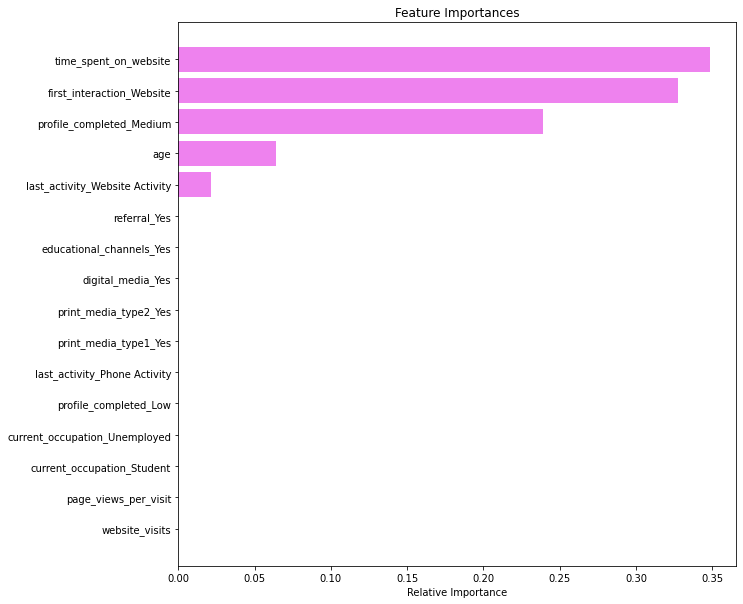

In [35]:
#Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
features = list(X.columns)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now let's build another model - **a random forest classifier**

### **Random Forest Classifier**

### **Question 6:** 
- **Fit the random forest classifier on the training data (use random_state=7) (1 Mark)**
- **Check the performance on both training and testing data (use metrics_score function) (1 Mark)**
- **Write your observations (2 Marks)**

In [36]:
#Fitting the decision tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=7)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

**Let's check the performance of the model on the training data:**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



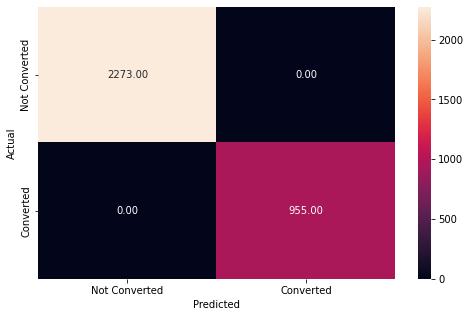

In [37]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

**Observations:**

- This base (untuned) random forest classifier gives perfect accuracy (100%) and f1-score (100%) on the training dataset, indicating that it is likely overfit to the training data. 
- Similar to the base decision tree model above, this base random forest classfiier makes no classification errors. 
- TP = 955, TN = 2273, FP = 0, FN = 0; errors = 0.


**Let's confirm this by checking its performance on the testing data:**

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



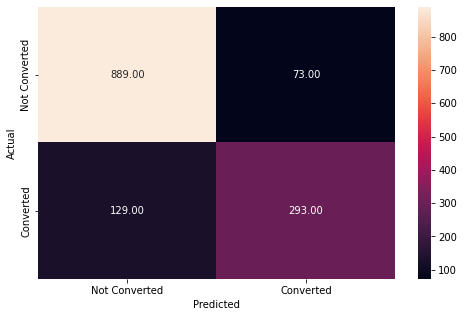

In [38]:
#Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

**Observations:**

- As expected, the performance of this base (untuned) random forest classifer is worse on the test dataset than on the training dataset.  
- The accuracy of the rf classifier is about 85%, better than the accuracy of the tuned decision tree classifier.  The f1-score of the rf classifier lies between 74-90%, for which there wasn't a significant improvement over the decision tree classifiers obtained above.  
- Reading the confusion matrix, TP = 293, TN = 889, FP = 73, FN = 129.  Total errors in classification = FP + FN = 202. 

**Let's see if we can get a better model by tuning the random forest classifier:**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [39]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [40]:
#Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



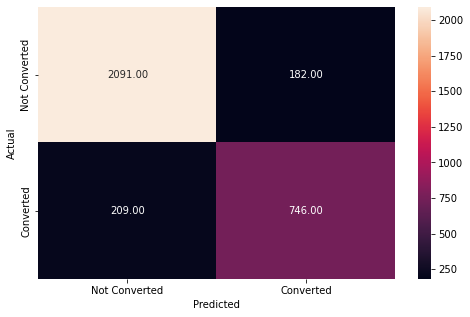

In [41]:
#Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

**Observations:**
- We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get a better performance.

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.** 

### **Question 7:**
- **Tune the random forest classifier using GridSearchCV (2 Marks)**
- **Check the performance on both training and testing data (2 Marks)**
- **Compare the results with the results from the random forest model with default parameters and write your observations (2 Marks)**

In [42]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0:0.7, 1:0.3}, "balanced", {0:0.4, 1:0.1}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model:**

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



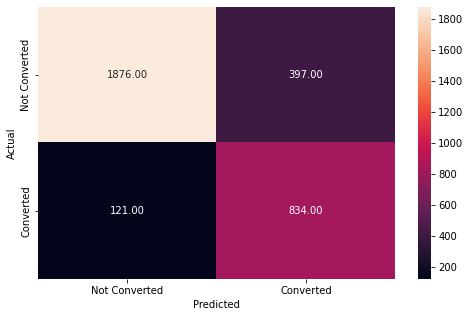

In [43]:
#Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train5)

**Observations:**
- The performance of the rf model tuned on the second pass is even worse than the one tuned on the first pass, when evaluated on the training dataset.  
- It appears that tuning the parameters max_samples, min_samples_leaf, and increasing n_estimators above 110 resulted in worsening on the performance of the tuned rf model.  
- This final tuned rf model has an accuracy of about 84% on the training dataset and an f1-score between 76-88%. 
- This model is unlikely to be overtrained on the training data.  

**Let's check the model performance on the test data:**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



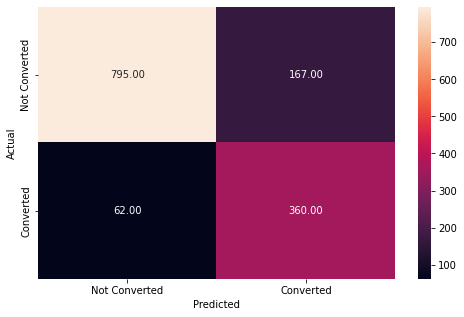

In [44]:
#Checking performance on the testing data
y_pred_test5 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test5)

**Observations:**

- The performance of the above tuned rf model on the test dataset is comparable to its performance on the training dataset, indicating that the model was not overfit to the training dataset.  
- The accuracy on the test dataset of the tuned rf model is about 83% and f1-score is about 76-87%.  
- Thus, the performance of rf even after tuning was not significantly improved over the base or tuned decision tree models.  

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importances of the model.**

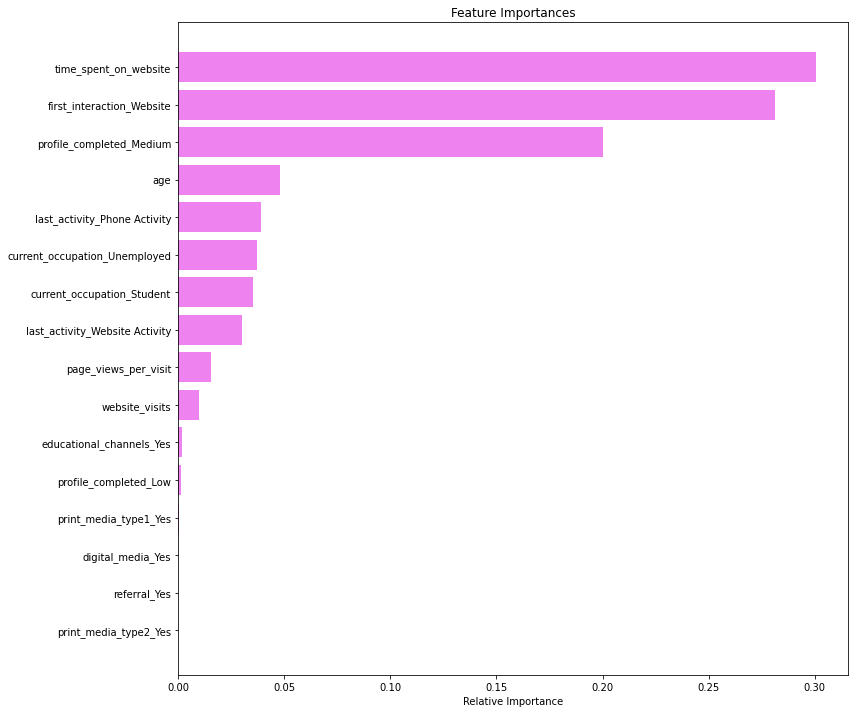

In [45]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help to distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Question 8:**

**Write your conclusions on the key factors that drive the conversion of leads and write your recommendations to the business on how can they improve the conversion rate. (5 Marks)**

**Conclusions:**

Based on the exploratory data analysis
- Most of the leads are working professions. Majority of the leads interacted from the website as opposed to mobile. Almost 50% of the leads were high and medium profile completion each. Time spent on website had a weak correlation with conversion status. 
- The dataset was imbalanced: only ~30% of leads have been converted
- Working professionals were in the majority and are most likely to convert.  Students are least likely to be converted.
- Conversions through website are much higher than through the mobile app
- The median time_spent_on_website is much higher (almost twice) for the leads than converter versus the leads that did not convert.
- Leads with high profile completion were most likely to convert. 
- There were very few referrals, but the conversions through referrals were high.  

Based on modeling and classification through decision trees and random forests
- The base decision tree and base random forest models were both overfit to the training data, indicating the need for hyperparameter tuning to adjust parameters such as max_depth. 
- The tuned classifiers (both decision tree and random forest) gave about 85% accuracy and an f1-score of about 75-85% on the test dataset.  
- The tuned classifiers (both decision tree and rf) gave most importance to features such as time spent on website, first_interaction_website, profile_completed, and age.  
- Unlike the tuned decision tree classifier, the tuned random forest classifier also gave some importance to other features such as last activity, current occupation, page views per visit, website visits, education channels.   

**Recommendations:**

- Based on both the exploratory analysis, as well as the outcome of the decision tree and random forest classifiers, the features of most importance and association with the conversion status are: time spent on website, first_interaction_website, profile_completed, and age.  
- Other features of (lower) importance are last activity, current occupation, page views per visit, website visits, education channels.
- Therefore, focus marketing efforts on leads that spend more time on the website, have a high profile completion, have a first interaction through the website rather than mobile, have a higher age (are more likely to be working professionals). 
- Secondary factors to consider when targeting marketing resources towards leads are: last activity, page views per visit, website visits, and education channels.  
- The mobile app does not seem to be performing as well as the website and therefore has scope for improvement.    
